In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
os.chdir(r"C:\Users\athar\Downloads\py-master\py-master\DeepLearningML\11_chrun_prediction")

In [4]:
data = pd.read_csv("Churn_Modelling.csv")

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.drop(["RowNumber","CustomerId","Surname"],axis =1, inplace=True)
data.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1120,848,Germany,Male,31,4,90018.45,2,1,0,193132.98,0
1899,627,Spain,Female,30,6,0.00,1,1,1,113408.47,0
8499,498,Germany,Male,35,2,121968.11,2,0,1,188343.05,0


In [10]:
data.shape

(10000, 11)

In [13]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
for i in data:
    print(f'{(i)} : {data[i].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [32]:
data.replace({"France" : 0, "Spain" : 1, "Germany" : 2}, inplace=True)
data.replace({"Female" : 0, "Male" : 1}, inplace=True)

In [33]:
for i in data:
    print(f'{(i)} : {data[i].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [34]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [36]:
data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

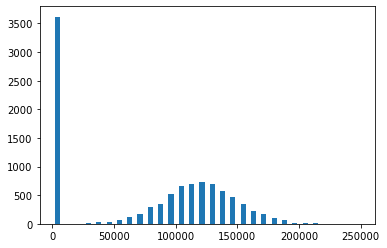

In [41]:
plt.hist(data.Balance, bins=30, rwidth=0.5);

In [42]:
data.Balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [45]:
data[data.Balance==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.0,1,1,1,101348.88,1
3,699,0,0,39,1,0.0,2,0,0,93826.63,0
6,822,0,1,50,7,0.0,2,1,1,10062.80,0
11,497,1,1,24,3,0.0,2,1,0,76390.01,0
12,476,0,0,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,1,1,28,4,0.0,2,1,1,179436.60,0
9992,726,1,1,36,2,0.0,1,1,0,195192.40,0
9994,800,0,0,29,2,0.0,2,0,0,167773.55,0
9995,771,0,1,39,5,0.0,2,1,0,96270.64,0


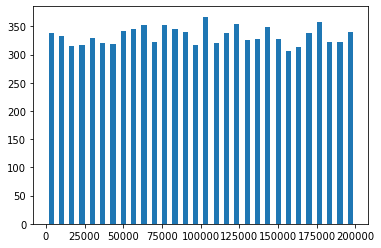

In [47]:
plt.hist(data.EstimatedSalary, bins=30, rwidth=0.5);

In [48]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [51]:
cols_to_scale = ["CreditScore","Balance","EstimatedSalary"]
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [52]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,42,2,0.000000,1,1,1,0.506735,1
1,0.516,1,0,41,1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,42,8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,39,1,0.000000,2,0,0,0.469120,0
4,1.000,1,0,43,2,0.500246,1,1,1,0.395400,0


In [53]:
X = data.drop(["Exited"],axis =1)
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0,0,42,2,0.000000,1,1,1,0.506735
1,0.516,1,0,41,1,0.334031,1,0,1,0.562709


In [54]:
y = data["Exited"]
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [58]:
X_train.shape

(8000, 10)

In [59]:
X_test.shape

(2000, 10)

In [64]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train, epochs=500)

Epoch 1/500
250/250 [==============================] - 0s 779us/step - loss: 0.6047 - accuracy: 0.7205
Epoch 2/500
250/250 [==============================] - 0s 791us/step - loss: 0.5071 - accuracy: 0.7981
Epoch 3/500
250/250 [==============================] - 0s 795us/step - loss: 0.4886 - accuracy: 0.7981
Epoch 4/500
250/250 [==============================] - 0s 783us/step - loss: 0.4709 - accuracy: 0.7981
Epoch 5/500
250/250 [==============================] - 0s 795us/step - loss: 0.4575 - accuracy: 0.7981
Epoch 6/500
250/250 [==============================] - 0s 791us/step - loss: 0.4515 - accuracy: 0.7981
Epoch 7/500
250/250 [==============================] - 0s 783us/step - loss: 0.4484 - accuracy: 0.7981
Epoch 8/500
250/250 [==============================] - 0s 799us/step - loss: 0.4439 - accuracy: 0.8087
Epoch 9/500
250/250 [==============================] - 0s 779us/step - loss: 0.4413 - accuracy: 0.8146
Epoch 10/500
250/250 [==============================] - 0s 779us/step - l

250/250 [==============================] - 0s 817us/step - loss: 0.4039 - accuracy: 0.8317
Epoch 80/500
250/250 [==============================] - 0s 827us/step - loss: 0.4039 - accuracy: 0.8328
Epoch 81/500
250/250 [==============================] - 0s 823us/step - loss: 0.4042 - accuracy: 0.8317
Epoch 82/500
250/250 [==============================] - 0s 815us/step - loss: 0.4028 - accuracy: 0.8303
Epoch 83/500
250/250 [==============================] - 0s 784us/step - loss: 0.4019 - accuracy: 0.8336
Epoch 84/500
250/250 [==============================] - 0s 779us/step - loss: 0.4051 - accuracy: 0.8317
Epoch 85/500
250/250 [==============================] - 0s 775us/step - loss: 0.4031 - accuracy: 0.8344
Epoch 86/500
250/250 [==============================] - 0s 763us/step - loss: 0.4040 - accuracy: 0.8339
Epoch 87/500
250/250 [==============================] - 0s 761us/step - loss: 0.4034 - accuracy: 0.8349
Epoch 88/500
250/250 [==============================] - 0s 775us/step - loss:

250/250 [==============================] - 0s 848us/step - loss: 0.4018 - accuracy: 0.8309
Epoch 158/500
250/250 [==============================] - 0s 775us/step - loss: 0.3997 - accuracy: 0.8322
Epoch 159/500
250/250 [==============================] - 0s 795us/step - loss: 0.3994 - accuracy: 0.8332
Epoch 160/500
250/250 [==============================] - 0s 787us/step - loss: 0.4003 - accuracy: 0.8329
Epoch 161/500
250/250 [==============================] - 0s 771us/step - loss: 0.4009 - accuracy: 0.8328
Epoch 162/500
250/250 [==============================] - 0s 768us/step - loss: 0.3994 - accuracy: 0.8344
Epoch 163/500
250/250 [==============================] - 0s 775us/step - loss: 0.4007 - accuracy: 0.8319
Epoch 164/500
250/250 [==============================] - 0s 775us/step - loss: 0.4002 - accuracy: 0.8322
Epoch 165/500
250/250 [==============================] - 0s 795us/step - loss: 0.4004 - accuracy: 0.8324
Epoch 166/500
250/250 [==============================] - 0s 783us/ste

250/250 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8319
Epoch 236/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8328
Epoch 237/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8330
Epoch 238/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8332
Epoch 239/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8328
Epoch 240/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8321
Epoch 241/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8313
Epoch 242/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8303
Epoch 243/500
250/250 [==============================] - 0s 976us/step - loss: 0.3993 - accuracy: 0.8326
Epoch 244/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3984 -

250/250 [==============================] - 0s 940us/step - loss: 0.3973 - accuracy: 0.8295
Epoch 314/500
250/250 [==============================] - 0s 791us/step - loss: 0.3978 - accuracy: 0.8320
Epoch 315/500
250/250 [==============================] - 0s 844us/step - loss: 0.3993 - accuracy: 0.8316
Epoch 316/500
250/250 [==============================] - 0s 832us/step - loss: 0.3988 - accuracy: 0.8331
Epoch 317/500
250/250 [==============================] - 0s 823us/step - loss: 0.3988 - accuracy: 0.8320
Epoch 318/500
250/250 [==============================] - 0s 799us/step - loss: 0.3990 - accuracy: 0.8314
Epoch 319/500
250/250 [==============================] - 0s 823us/step - loss: 0.3984 - accuracy: 0.8305
Epoch 320/500
250/250 [==============================] - 0s 823us/step - loss: 0.3974 - accuracy: 0.8328
Epoch 321/500
250/250 [==============================] - 0s 819us/step - loss: 0.3980 - accuracy: 0.8314
Epoch 322/500
250/250 [==============================] - 0s 787us/ste

250/250 [==============================] - 0s 795us/step - loss: 0.3973 - accuracy: 0.8328
Epoch 392/500
250/250 [==============================] - 0s 795us/step - loss: 0.3972 - accuracy: 0.8315
Epoch 393/500
250/250 [==============================] - 0s 771us/step - loss: 0.3966 - accuracy: 0.8332
Epoch 394/500
250/250 [==============================] - 0s 799us/step - loss: 0.3973 - accuracy: 0.8319
Epoch 395/500
250/250 [==============================] - 0s 807us/step - loss: 0.3975 - accuracy: 0.8319
Epoch 396/500
250/250 [==============================] - 0s 799us/step - loss: 0.3969 - accuracy: 0.8322
Epoch 397/500
250/250 [==============================] - 0s 791us/step - loss: 0.3975 - accuracy: 0.8311
Epoch 398/500
250/250 [==============================] - 0s 787us/step - loss: 0.3973 - accuracy: 0.8338
Epoch 399/500
250/250 [==============================] - 0s 783us/step - loss: 0.3976 - accuracy: 0.8320
Epoch 400/500
250/250 [==============================] - 0s 791us/ste

250/250 [==============================] - 0s 778us/step - loss: 0.3965 - accuracy: 0.8338
Epoch 470/500
250/250 [==============================] - 0s 787us/step - loss: 0.3959 - accuracy: 0.8329
Epoch 471/500
250/250 [==============================] - 0s 791us/step - loss: 0.3968 - accuracy: 0.8322
Epoch 472/500
250/250 [==============================] - 0s 775us/step - loss: 0.3963 - accuracy: 0.8317
Epoch 473/500
250/250 [==============================] - 0s 783us/step - loss: 0.3962 - accuracy: 0.8324
Epoch 474/500
250/250 [==============================] - 0s 767us/step - loss: 0.3960 - accuracy: 0.8331
Epoch 475/500
250/250 [==============================] - 0s 819us/step - loss: 0.3971 - accuracy: 0.8314
Epoch 476/500
250/250 [==============================] - 0s 787us/step - loss: 0.3958 - accuracy: 0.8326
Epoch 477/500
250/250 [==============================] - 0s 763us/step - loss: 0.3957 - accuracy: 0.8336
Epoch 478/500
250/250 [==============================] - 0s 763us/ste

In [65]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 742us/step - loss: 0.4227 - accuracy: 0.8200


[0.4227153956890106, 0.8199999928474426]

In [72]:
y_pred = model.predict(X_test)

y_predicted = []

for i in y_pred:
    if i <0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

In [73]:
y_predicted

[0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [76]:
y_test

937     0
9355    0
2293    1
192     0
8675    0
       ..
5624    0
6005    0
987     1
6152    0
2092    1
Name: Exited, Length: 2000, dtype: int64

In [78]:
cm = confusion_matrix(y_predicted,y_test)
cm

array([[1503,  285],
       [  75,  137]], dtype=int64)

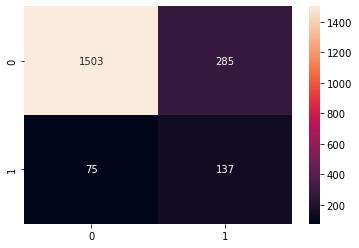

In [83]:
sns.heatmap(cm, annot=True, fmt="d");

In [87]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1578
           1       0.65      0.32      0.43       422

    accuracy                           0.82      2000
   macro avg       0.74      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000

